In [1]:
import numpy as np   # Importo paquete de álgebra lineal
import matplotlib.pyplot as plt   # Importo paquete de gráficos
import math   # Importo paquete de funciones matemáticas
import random   # Importo paquete para generar números pseudoaleatorios
import pandas as pd # Importo paquete para crear tablas.

## Problema 7

La fuerza efectiva que realiza el viento sobre el mástil de un bote de velas puede aproximarse por la siguiente expresión:
\begin{equation}
F = \int_0^{30} 200 \left(\frac{z}{5+z}\right) e^{-2z/30} dz
\end{equation}

, donde F está dada en lbs y las distancias en pies. Estime, utilizando los métodos de trapecios, de Simpson 1/3 y cuadraturas de Gauss, cuánto vale la fuerza total y dónde será el punto de acción efectiva de esta fuerza.
\begin{equation}
d = \int_0^{30} z f(z) dz
\end{equation}
Utilice varios tamaños de paso de integración, entre 5 y 0,05 pies, y estudie la convergencia de cada método.

In [2]:
# Defino el integrando de F.
def intF(z):
    F = 200*(z/(5+z))*np.exp(-2*z/30)
    
    return F

In [3]:
# Defino el integrando de d.
# def intd(z):
#     d = z*intF(z)
#     
#     return d

In [4]:
# Defino límite inferior "li" del intervalo de integración.
li = 0

# Defino límite superior "ls" del intervalo de integración.
ls = 30

In [5]:
# Defino la cantidad de subintervalos en los que se dividirá el intervalo de integración.
p = 200

## Método de TRAPECIOS

### Cálculo de fuerza efectiva, F

In [6]:
# Defino función "trapeciosF", que integra por método de TRAPECIOS y calcula la fuerza efectiva "IT".
def trapeciosF(p,li,ls,intF):
    # Defino el integrando de F.
    # def intF(z):
    #     F = 200*(z/(5+z))*np.exp(-2*z/30)
    # 
    #     return F
    
    # Divido el intervalo [li,ls] en "p" subintervalos.
    x = np.linspace(li,ls, p+1)
    
    # Calculo la separación "h" entre intervalos.
    h = (ls-li)/p
    
    # Calculo "f(li)".
    f_0 = intF(li)
    
    # Calculo "f(ls)".
    f_n = intF(ls)
    
    # Calculo la sumatoria de "f(x)" evaluada entre [li+1,ls-1].
    f = 0   # Variable para ir sumando términos.
    sum = []   # Vector que irá actualizando las sumas a medida que se realizan.
    
    # El último elemento de "sum" tendrá el valor final de la sumatoria, este es "sum[-1]".
    for i, xi in enumerate(x[1:-1]):
        # Evalúo "f(x)" en el siguiente valor "x=xi", y sumo lo obtenido a lo que ya había obtenido antes.
        f += intF(xi)
        # Almaceno el valor actualizado de la sumatoria en "sum".
        sum.append(f)
    
    # Calculo la integral "IT".
    IT = (h/2)*(f_0 + 2*sum[-1] + f_n)
    return IT

In [7]:
FT = trapeciosF(p,li,ls,intF)
print(FT)

1480.490796563459


## Método de SIMPSON 1/3

### Cálculo de fuerza efectiva, F

In [8]:
# Defino función "simpsonF", que integra por método de SIMPSON 1/3 y calcula la fuerza efectiva "IS".
# IMPORTANTE: p debe ser PAR!!!
def simpsonF(p,li,ls,intF):
    # Defino el integrando de F.
    # def intF(z):
    #     F = 200*(z/(5+z))*np.exp(-2*z/30)
    # 
    #     return F
    
    # Divido el intervalo [li,ls] en "p" subintervalos.
    x = np.linspace(li,ls, p+1)
    
    # Calculo la separación "h" entre intervalos.
    h = (ls-li)/p
    
    # Calculo "f(li)".
    f_0 = intF(li)
    
    # Calculo "f(ls)".
    f_n = intF(ls)
    
    # Las siguientes sumatorias son evaluadas en valores que deben estar en el intervalo [li+1,ls-1].
    fpar = 0   # Variable para ir sumando términos pares.
    sumpar = []   # Vector que irá actualizando las sumas pares a medida que se realizan.
    fimpar = 0   # Variable para ir sumando términos impares.
    sumimpar = []   # Vector que irá actualizando las sumas impares a medida que se realizan.
    
    for i, xi in enumerate(x[1:-1]):
        # Corrijo el valor de "i", que en la primer iteración debería arrancar en 1 (para tener "f_1") pero lo hace en 0 (y no
        # debe ser así, ya que a "f_0" ya la tenemos).
        j = i+1
        
        if j % 2 == 0:
            # Corresponde a los PARES.
            # Evalúo "f(x)" en el siguiente valor "x=xi", y sumo lo obtenido a lo que ya había obtenido antes.
            fpar += intF(xi)
            # Almaceno el valor actualizado de la sumatoria en "sumpar".
            sumpar.append(fpar)
            # El último elemento de "sumpar" tendrá el valor final de la sumatoria, este es "sumpar[-1]".
        elif j % 2 == 1:
            # Corresponde a los IMPARES.
            # Evalúo "f(x)" en el siguiente valor "x=xi", y sumo lo obtenido a lo que ya había obtenido antes.
            fimpar += intF(xi)
            # Almaceno el valor actualizado de la sumatoria en "sumimpar".
            sumimpar.append(fimpar)
            # El último elemento de "sumimpar" tendrá el valor final de la sumatoria, este es "sumimpar[-1]".
    
    # Calculo la integral "IS".
    IS = (h/3)*(f_0 + 2*sumpar[-1] + 4*sumimpar[-1] + f_n)
    return IS

In [9]:
FS = simpsonF(p,li,ls,intF)
print(FS)

1480.5684426562134


## Método de CUADRATURA DE GAUSS

### Cálculo de fuerza efectiva, F

In [10]:
# Defino función "cuadgaussF", que integra por método de CUADRATURA DE GAUSS y calcula la fuerza efectiva "IG".
def cuadgaussF(li,ls,intF,p=2):
    # Defino el integrando de F.
    # def intF(z):
    #     F = 200*(z/(5+z))*np.exp(-2*z/30)
    #     
        # ME DA RE MAL, es por la función F que estoy usando, PRUEBO CON EL EJEMPLO DE Wikipedia.
        # F = z**3 + 2*(z**2)
    
    #     return F
    
    # Debido a los cambios de variable "x = m*t +c" y "dx = m*dt", defino "m" y "c".
    m = (ls-li)/2
    c = (ls+li)/2
    
    # POR DEFECTO, definí que el número de puntos sea "p=2". Se puede GENERALIZAR a futuro.
    # https://es.wikipedia.org/wiki/Cuadratura_de_Gauss#F%C3%B3rmula_para_calcular_%7F'%22%60UNIQ--postMath-00000004-QINU%60%22'%7F
    
    # Evalúo cómo seguir, según sea el número de puntos "p".
    # IMPORTANTE: Sólo admite hasta "p=4".
    if p==1:
        # Por lo tanto, las raíces de los polinomios de Legendre son los elementos de "t".
        t = [0]
        # Los pesos asociados a los elementos de "t" son los elementos de "w".
        w = [2]
    elif p==2:
        # Por lo tanto, las raíces de los polinomios de Legendre son los elementos de "t".
        t = [-1/(3**(1/2)), 1/(3**(1/2))]
        # Los pesos asociados a los elementos de "t" son los elementos de "w".
        w = [1,1]
    elif p==3:
        # Por lo tanto, las raíces de los polinomios de Legendre son los elementos de "t".
        t = [0,-((3/5)**(1/2)), ((3/5)**(1/2))]
        # Los pesos asociados a los elementos de "t" son los elementos de "w".
        w = [8/9,5/9,5/9]
    elif p==4:
        # Por lo tanto, las raíces de los polinomios de Legendre son los elementos de "t".
        t = [((3 - 2*(6/5)**(1/2))/7)**(1/2),-(((3 - 2*(6/5)**(1/2))/7)**(1/2)),((3 + 2*(6/5)**(1/2))/7)**(1/2), -(((3 + 2*(6/5)**(1/2))/7)**(1/2))]
        # Los pesos asociados a los elementos de "t" son los elementos de "w".
        w = [(18 + (30)**(1/2))/36,(18 + (30)**(1/2))/36,(18 - (30)**(1/2))/36,(18 - (30)**(1/2))/36]

    # Defino vector "x", lo completaré en la sumatoria.
    x = []
    
    # Calculamos la sumatoria "sum".
    sum = 0
    
    for i, ti in enumerate(t):
        # Completo "x" tal que "x[i] = m*t[i] + c".
        x.append(m*ti + c)
        sum += w[i]*intF(x[i])
    
    # Calculo la integral "IG".
    IG = m*sum
    return(IG)

In [11]:
FG2 = cuadgaussF(li,ls,intF,2)
print(FG2)

# Mejoro la precisión un poco, haciendo "p=3".
FG3 = cuadgaussF(li,ls,intF,3)
print(FG3)

# Mejoro la precisión un poco, haciendo "p=4".
FG4 = cuadgaussF(li,ls,intF,4)
print(FG4)

# 1610.5722652945797
# Acá, con el ejemplo de Wikipedia, me da la solución exacta. ME QUEDO TRANQUILO DE QUE ANDA BIEN.
# FG2 = cuadgaussF(1,5)
# print(FG2)

1610.5722652945797
1510.3329289542537
1486.8214610631935


## Teórico

1480.568480085906

## Estudio de CONVERGENCIA de cada método

In [12]:
# Suponer que "I_N" es el valor de la integral cuando se emplearon N intervalos, "I_{N-1}" es el valor de la integral cuando se
# emplearon N-1 intervalos, y (I_N - I_{N-1})/I_N es el cambio relativo del valor de la integral por haber considerado un
# intervalo más (es decir, por haber reducido el paso de integración; refinamiento del cálculo).

# Para estudiar la CONVERGENCIA DE UNA INTEGRAL, se debe realizar un gráfico de (I_N - I_{N-1})/I_N vs. Número de intervalos
# considerados. Para que la integral converja, debe observarse que a medida que se toma mayor número de intervalos, el valor
# (I_N - I_{N-1})/I_N se estanca o queda por debajo de una tolerancia relativa.

# Defino un vector "nint" con espaciado logarítmico, tal que "nint[0] = 10^a", "nint[-1] = 10^b" y que tenga "c" componentes.
# Sus componentes contienen la cantidad de intervalos en los que dividiré mi intervalo de integración.
a = 1
b = 3
c = 25
nint = np.logspace(a,b,c).astype(int)
print(nint)

[  10   12   14   17   21   26   31   38   46   56   68   82  100  121
  146  177  215  261  316  383  464  562  681  825 1000]


In [13]:
# Debido a que el método de SIMPSON 1/3 requiere "p" par, haremos que todos los elementos de "nint" sean pares.
for i, xi in enumerate(nint):
    if nint[i] % 2 == 1:
        # Es impar, así que debo convertirlo en par. Lo haré sumándole 1.
        nint[i] += 1
print(nint)

[  10   12   14   18   22   26   32   38   46   56   68   82  100  122
  146  178  216  262  316  384  464  562  682  826 1000]


In [14]:
# Resuelvo la integral mediante el método de TRAPECIOS, empleando diferentes intervalos de integración "tp" almacenados en
# "nint".
IT = [trapeciosF(tp,li,ls,intF) for tp in nint]

# Calculo el valor absoluto del cambio relativo del valor de la integral como consecuencia de ir incrementando el número de
# intervalos considerados. Los almaceno en un vector "eT", donde "eT[i] = |(IT[i+1]-IT[i])/IT[i+1]|". Por su definición, se
# ve que "eL" tiene tamaño "len(IT)-1".
eT = []

for i in range(len(IT)-1):
    eT.append(np.abs((IT[i+1]-IT[i])/IT[i+1]))
print(eT)

[0.0060591233072057335, 0.00370882367468783, 0.004104856133079175, 0.0021005598375330487, 0.0012153080586760378, 0.0010452258328897742, 0.0005923582478855131, 0.00045953196590479755, 0.00032163684055861136, 0.00021493298938444116, 0.00014156624728239018, 0.00010216449136000925, 6.883036884432581e-05, 4.253410229550462e-05, 3.22126486234072e-05, 2.1254632188474164e-05, 1.4408748679406971e-05, 9.556860585087457e-06, 6.785066537132888e-06, 4.485186531780736e-06, 3.1035886547005995e-06, 2.132867426000157e-06, 1.4362880473362158e-06, 9.774588219739532e-07]


In [15]:
# Resuelvo la integral mediante el método de SIMPSON 1/3, empleando diferentes intervalos de integración "sp" almacenados en
# "nint".
IS = [simpsonF(sp,li,ls,intF) for sp in nint]

# Calculo el valor absoluto del cambio relativo del valor de la integral como consecuencia de ir incrementando el número de
# intervalos considerados. Los almaceno en un vector "eS", donde "eS[i] = |(IS[i+1]-IS[i])/IS[i+1]|". Por su definición, se
# ve que "eS" tiene tamaño "len(IS)-1".
eS = []

for i in range(len(IS)-1):
    eS.append(np.abs((IS[i+1]-IS[i])/IS[i+1]))
print(eS)

[0.0011220333766321804, 0.0005489513282999035, 0.00046011281114759765, 0.00016439963761884146, 6.975064880978045e-05, 4.356264542202331e-05, 1.7425476476028134e-05, 9.680503146844828e-06, 4.695728228662295e-06, 2.152243889101167e-06, 9.763469166084003e-07, 4.834280718788604e-07, 2.1999155726217553e-07, 9.307594317914921e-08, 4.858514353053836e-08, 2.168252712871516e-08, 9.995754993347185e-09, 4.5301428489251895e-09, 2.1985813249053156e-09, 9.890424882324905e-10, 4.679333454019607e-10, 2.18897662910183e-10, 1.0026676912225458e-10, 4.653719199513716e-11]


In [16]:
# Resuelvo la integral mediante el método de CUADRATURA DE GAUSS, empleando diferentes intervalos de integración "gp" 
# almacenados en "nint".
#IG = [cug.cuadgauss(gp) for gp in nint]

# Calculo el valor absoluto del cambio relativo del valor de la integral como consecuencia de ir incrementando el número de
# intervalos considerados. Los almaceno en un vector "eG", donde "eG[i] = |(IG[i+1]-IG[i])/IG[i+1]|". Por su definición, se
# ve que "eG" tiene tamaño "len(IG)-1".
#eG = []

#for i in range(len(IG)-1):
#    eG.append(np.abs((IG[i+1]-IG[i])/IG[i+1]))

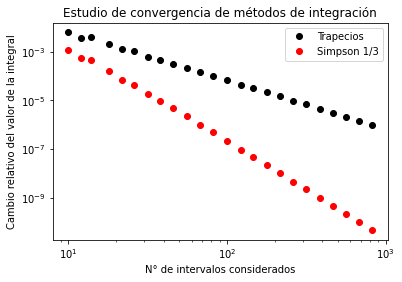

In [17]:
# Grafico "e vs nint", para los tres métodos. No grafico el último valor de "nint", porque "e" tiene un valor menos.
plt.loglog(nint[:-1], eT,'ok', label='Trapecios')
plt.loglog(nint[:-1], eS,'or', label='Simpson 1/3')
#plt.loglog(nint[:-1], eG,'ok', label='Cuadratura de Gauss')
plt.xlabel('N° de intervalos considerados')
plt.ylabel('Cambio relativo del valor de la integral')
plt.title('Estudio de convergencia de métodos de integración')
plt.legend()